In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import t, sem
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#### Using Vader to get the sentiment score

In [41]:
movies_df = pd.read_csv('movies.csv')

In [5]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    if text != 'No reviews available': # If there is actually a review
        return analyzer.polarity_scores(text)['compound']
    else:
        return 0 

movies_df['sentiment'] = movies_df['reviews'].apply(get_vader_score)

### EDAAAAA

In [11]:
movies = pd.read_csv('movies_data.csv')

In [3]:
movies[['budget', 'revenue', 'popularity', 'vote_average', 'sentiment']].describe()

,budget,revenue,popularity,vote_average,sentiment
count,2.620000e+03,2.620000e+03,2620.000000,2620.000000,2620.000000
mean,2.788199e+07,9.050656e+07,24.911435,6.665385,0.435193
std,3.622989e+07,1.485630e+08,25.428911,0.833249,0.591893
min,0.000000e+00,6.000000e+00,0.000000,0.000000,-0.999600
25%,2.500000e+06,7.989823e+06,11.453500,6.142750,0.000000
50%,1.500000e+07,3.454835e+07,17.566000,6.693500,0.715800
75%,4.000000e+07,1.112924e+08,29.159000,7.260000,0.992425
max,3.790000e+08,2.264162e+09,453.444000,8.707000,1.000000


In [5]:
sns.set_style("whitegrid")
sns.set_palette('tab10')

#### Scatterplot of Budget Vs Revenue with color for Sentiment

<Axes: xlabel='budget', ylabel='revenue'>

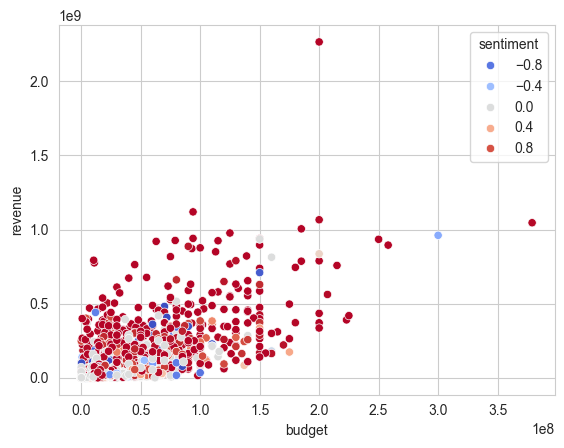

In [6]:
sns.scatterplot(movies, x = 'budget', y = 'revenue', hue = 'sentiment', palette= 'coolwarm')

#### Histograms for Revenue and Budget

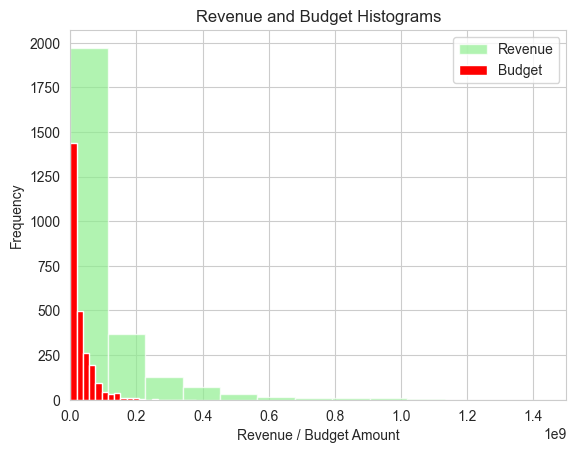

In [7]:
plt.hist(movies['revenue'], bins=20, color='lightgreen', alpha=0.7, label='Revenue')
plt.hist(movies['budget'], bins=20, color='red', label='Budget')

# Set the x-axis limit (max value to 1.5e+9)
plt.xlim(0, 1.5e9)
# Add a title and labels
plt.title('Revenue and Budget Histograms')

plt.xlabel('Revenue / Budget Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Correlation of Numeric Variables

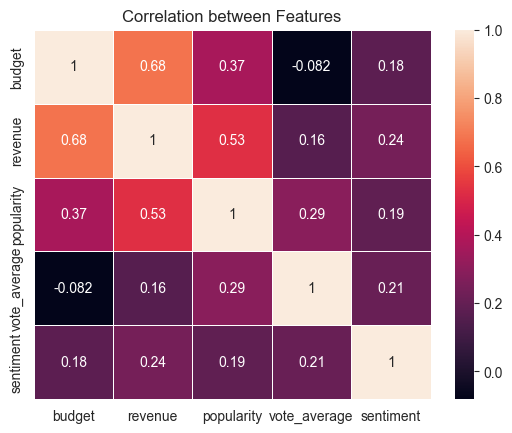

In [8]:
corr = movies[['budget', 'revenue', 'popularity', 'vote_average', 'sentiment']].corr()

sns.heatmap(corr, annot = True, linewidths=0.5)
plt.title('Correlation between Features')
plt.show()

#### Looking at Genres

We are going to need to use something like one-hot-encoding later that will take care of our problem where movies have multiple genres. I think it would be cool though to use them as dummy variables so we can still use genre to help predict earnings

In [12]:
def convert_to_list(x):
    if isinstance(x, str) and x.strip():  # Check if x is a non-empty string
        return [genre.strip() for genre in x.split(',')]
    return ['Genre not listed'] 

# Apply the conversion function
movies['genres'] = movies['genres'].apply(convert_to_list)

# Verify the conversion worked
print(movies['genres'].head(50))

0                                              [Comedy]
1                             [Action, Crime, Thriller]
2                  [Adventure, Action, Science Fiction]
3                                   [Animation, Family]
4                              [Comedy, Drama, Romance]
5                                               [Drama]
6                                      [Mystery, Drama]
7                                        [Drama, Crime]
8                           [Horror, Thriller, Mystery]
9     [Adventure, Fantasy, Action, Thriller, Science...
10                             [Drama, Science Fiction]
11                                     [Drama, Romance]
12                         [Adventure, Fantasy, Action]
13                                      [Action, Crime]
14                                         [Drama, War]
15                                              [Drama]
16                              [Drama, Music, Romance]
17                                         [Dram

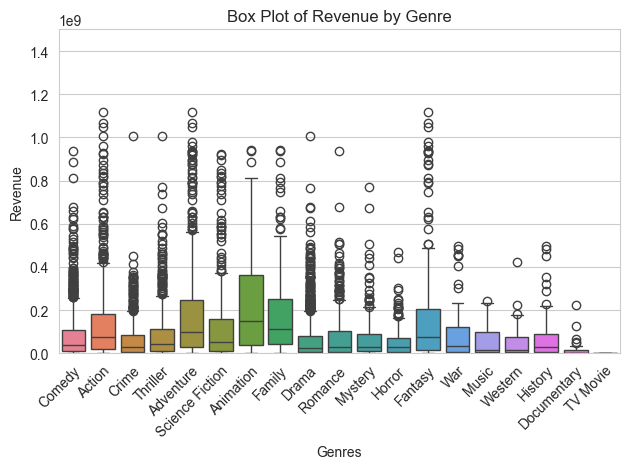

In [16]:
movies_genres = movies.explode('genres')

sns.boxplot(movies_genres, x = 'genres', y = 'revenue', hue = 'genres')
# Set plot labels and title
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Box Plot of Revenue by Genre')

# Limit the y-axis (adjust according to your dataset)
plt.ylim(0, 1.5e9)  # Example: limit to 1.5 billion

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()